In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [3]:
df = pd.read_csv('/kaggle/input/dataset-renamed/dataset_renamed.csv')  # <-- replace with your CSV path


In [4]:
df = df.drop('geometry', axis=1)


In [5]:
le_land = LabelEncoder()
le_soil = LabelEncoder()

In [6]:
df['Land Cover'] = le_land.fit_transform(df['Land Cover'])
df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])


In [7]:
X = df.drop('Flood Occurred', axis=1)
y = df['Flood Occurred']


In [8]:
categorical_features = ['State', 'District']
onehot = OneHotEncoder(drop='first', sparse=False)
ct = ColumnTransformer(transformers=[('onehot', onehot, categorical_features)], remainder='passthrough')
X_encoded = ct.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [12]:
y_train_pred = rf_model.predict(X_train)
print("=== Training Metrics ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

=== Training Metrics ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [13]:
y_pred = rf_model.predict(X_test)
print("\n=== Test Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



=== Test Metrics ===
Accuracy: 0.4997
Precision: 0.5148844496670584
Recall: 0.5099903006789525
F1 Score: 0.5124256895039471


In [14]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2368 2477]
 [2526 2629]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.49      0.49      4845
           1       0.51      0.51      0.51      5155

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [15]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
print("\nPredicted Flood Probabilities:\n", y_prob)



Predicted Flood Probabilities:
 [0.33  0.325 0.415 ... 0.46  0.53  0.39 ]


Correlation with Flood Occurred:
 Flood Occurred        1.000000
Historical Floods     0.010809
Longitude             0.008501
River Discharge       0.006359
District              0.006073
Rainfall              0.005544
Latitude              0.003989
Elevation             0.002589
Temperature           0.001754
Water Level           0.001464
Soil Type             0.000454
State                 0.000367
Population Density   -0.000049
Land Cover           -0.002777
Infrastructure       -0.002985
Humidity             -0.003704
Name: Flood Occurred, dtype: float64


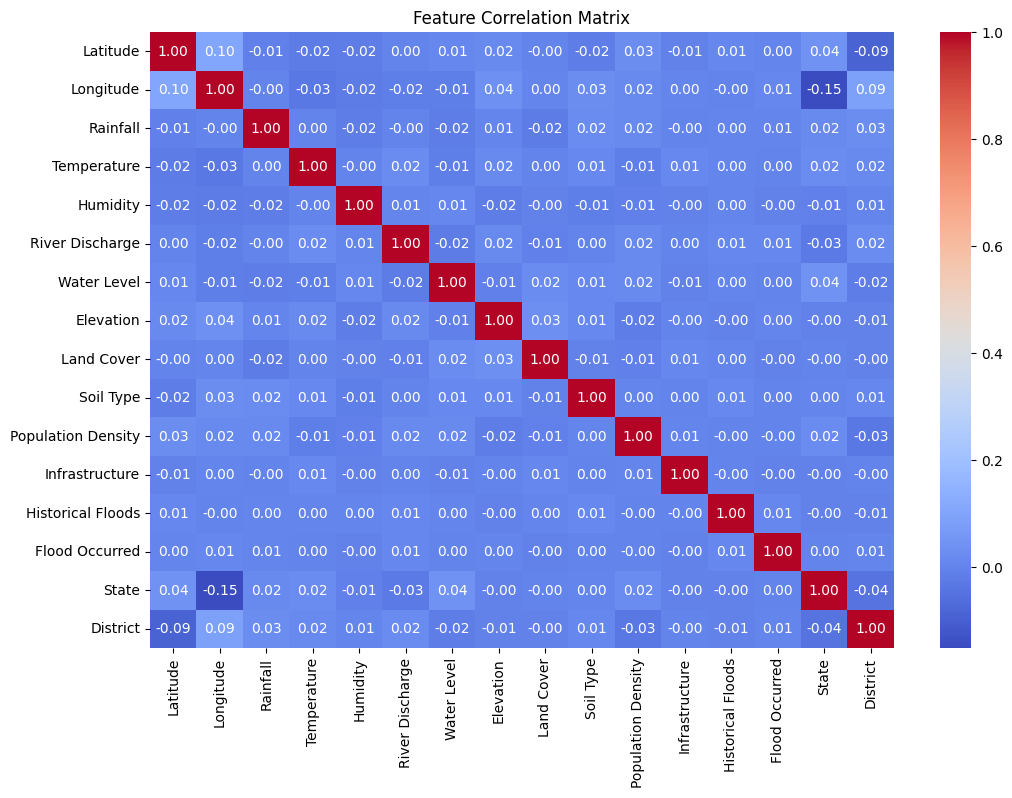

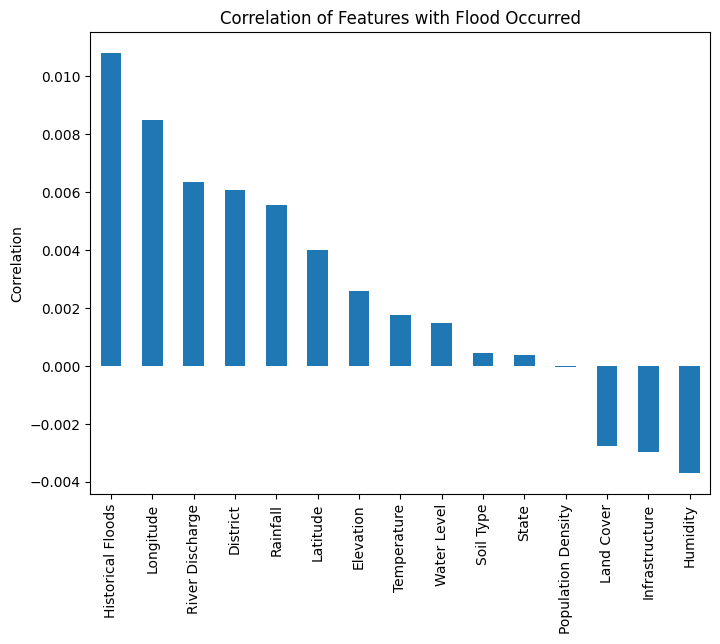

In [16]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/dataset-renamed/dataset_renamed.csv')  # replace with your CSV path

# Drop geometry column (already have Latitude and Longitude)
df = df.drop('geometry', axis=1)

# Encode categorical variables for correlation calculation
le_land = LabelEncoder()
le_soil = LabelEncoder()
le_state = LabelEncoder()
le_district = LabelEncoder()

df['Land Cover'] = le_land.fit_transform(df['Land Cover'])
df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])
df['State'] = le_state.fit_transform(df['State'])
df['District'] = le_district.fit_transform(df['District'])

# Compute correlation matrix
corr_matrix = df.corr()

# Correlation of each feature with Flood Occurred
corr_with_target = corr_matrix['Flood Occurred'].sort_values(ascending=False)
print("Correlation with Flood Occurred:\n", corr_with_target)

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Optional: Plot bar chart of correlation with target
plt.figure(figsize=(8, 6))
corr_with_target.drop('Flood Occurred').plot(kind='bar')
plt.title("Correlation of Features with Flood Occurred")
plt.ylabel("Correlation")
plt.show()


In [17]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/kaggle/input/dataset-renamed/dataset_renamed.csv')  # Replace with your CSV path

# Drop geometry column
df = df.drop('geometry', axis=1)

# Encode categorical variables
le_land = LabelEncoder()
le_soil = LabelEncoder()
le_state = LabelEncoder()

df['Land Cover'] = le_land.fit_transform(df['Land Cover'])
df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])
df['State'] = le_state.fit_transform(df['State'])

# ==========================
# 1. Interaction Features
# ==========================
df['Rainfall_Discharge'] = df['Rainfall'] * df['River Discharge']
df['Elevation_Water'] = df['Elevation'] - df['Water Level']
df['Rainfall_Humidity'] = df['Rainfall'] * df['Humidity']

# ==========================
# 2. Historical Flood Feature
# ==========================
df['Flood_History_Flag'] = df['Historical Floods'].apply(lambda x: 1 if x > 0 else 0)

# ==========================
# 3. Geospatial Binning
# ==========================
df['Lat_bin'] = pd.cut(df['Latitude'], bins=10, labels=False)
df['Lon_bin'] = pd.cut(df['Longitude'], bins=10, labels=False)

# ==========================
# 4. Flood Risk Score
# ==========================
df['Flood_Risk_Score'] = (df['Rainfall'] * 0.4 +
                          df['River Discharge'] * 0.3 +
                          df['Water Level'] * 0.3)

# ==========================
# Optional: Target Encoding for District
# ==========================
mean_flood_by_district = df.groupby('District')['Flood Occurred'].mean()
df['District_encoded'] = df['District'].map(mean_flood_by_district)
df = df.drop('District', axis=1)  # Drop original to avoid high-cardinality one-hot

# ==========================
# Ready for ML Model
# ==========================
print("Columns after feature engineering:\n", df.columns)
print("\nSample of engineered features:\n", df.head())


Columns after feature engineering:
 Index(['Latitude', 'Longitude', 'Rainfall', 'Temperature', 'Humidity',
       'River Discharge', 'Water Level', 'Elevation', 'Land Cover',
       'Soil Type', 'Population Density', 'Infrastructure',
       'Historical Floods', 'Flood Occurred', 'State', 'Rainfall_Discharge',
       'Elevation_Water', 'Rainfall_Humidity', 'Flood_History_Flag', 'Lat_bin',
       'Lon_bin', 'Flood_Risk_Score', 'District_encoded'],
      dtype='object')

Sample of engineered features:
     Latitude  Longitude    Rainfall  Temperature   Humidity  River Discharge  \
0  18.861663  78.835584  218.999493    34.144337  43.912963      4236.182888   
1  25.361096  85.610733  198.984191    21.569354  34.453690      3683.208933   
2  25.432335  90.125517  212.870315    35.607657  60.765855      1867.752445   
3  14.157834  77.647041   95.933187    36.564520  93.939027      3138.637678   
4  23.217937  74.963672  291.654891    18.082377  48.357780      3994.697746   

   Water Leve

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('/kaggle/input/dataset-renamed/dataset_renamed.csv')  # Replace with your CSV path

# Drop geometry column
df = df.drop('geometry', axis=1)

# Fill missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Encode categorical variables
le_land = LabelEncoder()
le_soil = LabelEncoder()
le_state = LabelEncoder()

df['Land Cover'] = le_land.fit_transform(df['Land Cover'])
df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])
df['State'] = le_state.fit_transform(df['State'])

# Target encoding for District
mean_flood_by_district = df.groupby('District')['Flood Occurred'].mean()
df['District_encoded'] = df['District'].map(mean_flood_by_district)
df = df.drop('District', axis=1)

# Features and target (raw features only, no engineered features)
X = df.drop('Flood Occurred', axis=1)
y = df['Flood Occurred']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==========================
# Random Forest Hyperparameter Grid
# ==========================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold CV, scoring by F1
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)

# Train best estimator on full training data
best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# ==========================
# Training Metrics
# ==========================
print("\n=== Training Metrics ===")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))

# ==========================
# Testing Metrics
# ==========================
print("\n=== Test Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

# Confusion matrix and classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 